In [1]:
import pandas as pd
from googletrans import Translator

In [ ]:
! python -m pip install pandas --upgrade

In [ ]:
! python -m pip install numpy --upgrade
! python -m pip install tensorflow --upgrade

In [2]:
# translating the data into english
# using google translate api
df = pd.read_csv("shuffled data.csv")
print(df.head())
test = pd.read_csv("shuffled test.csv")
print(test.head())

                                               hindi  complaint category
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...        NaN   kidnap
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...        NaN   murder
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...        NaN   kidnap
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...        NaN   murder
4  मवार को डकैती के मामलों में वांछित दो लोगों को...        NaN    theft
                                               hindi  complaint category
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...        NaN    theft
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...        NaN   murder
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...        NaN   murder
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...        NaN   murder
4  अम्बाला के एक गाँव में किसानों की खेत से फसल च...        NaN    theft


In [5]:
def translate(data):
    translator = Translator()
    translations = {}
        #print(column)
       # print(unique)
    for element in data['hindi']:
            translations[element] = translator.translate(element).text
    data['complaint'] = data['hindi'].map(translations)
    return data

In [6]:
df= translate(df)
test = translate(test)

print(df.head())
print(test.head())

                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint category  
0  Two children, a five-year-old boy and a two-ye...   kidnap  
1  In Panchkula, where the bride's neighbor alleg...   murder  
2  After kidnapping a seven-year-old child of his...   kidnap  
3  Just six months after marriage in Thanesar, a ...   murder  
4  Mawar has arrested two people wanted in robber...    theft  
                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...   

In [7]:
df.to_csv("translated data.csv",encoding="utf-8",index=False)
test.to_csv("translated test.csv",encoding="utf-8",index=False)

In [3]:
translated_data= pd.read_csv("translated data.csv")
translated_test = pd.read_csv("translated test.csv")


df['complaint'] = translated_data['complaint']
test['complaint'] = translated_test['complaint']

print(df.head())
print(test.head()) 

                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint category  
0  Two children, a five-year-old boy and a two-ye...   kidnap  
1  In Panchkula, where the bride's neighbor alleg...   murder  
2  After kidnapping a seven-year-old child of his...   kidnap  
3  Just six months after marriage in Thanesar, a ...   murder  
4  Mawar has arrested two people wanted in robber...    theft  
                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...   

https://www.projectpro.io/recipes/do-text-classification

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [8]:
# df= pd.read_csv('complaint with manual labels.csv')
df.head()

,hindi,complaint,category
0,सोनीपत में दो बच्चों पांच साल के लड़के और दो स...,"Two children, a five-year-old boy and a two-ye...",kidnap
1,पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...,"In Panchkula, where the bride's neighbor alleg...",murder
2,सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...,After kidnapping a seven-year-old child of his...,kidnap
3,थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...,"Just six months after marriage in Thanesar, a ...",murder
4,मवार को डकैती के मामलों में वांछित दो लोगों को...,Mawar has arrested two people wanted in robber...,theft


In [5]:
df['category'] = df.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})
test['category'] = test.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})


In [10]:
print(df.head())
df.tail()

                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint  category  
0  Two children, a five-year-old boy and a two-ye...         2  
1  In Panchkula, where the bride's neighbor alleg...         3  
2  After kidnapping a seven-year-old child of his...         2  
3  Just six months after marriage in Thanesar, a ...         3  
4  Mawar has arrested two people wanted in robber...         0  


,hindi,complaint,category
437,पंचकुला में महज 500 रुपये के लिए जम्मू कश्मीर ...,"In Panchkula, the youth returned home after wo...",3
438,सोमवार को मोटरसाइकिल पर सवार होकर आए दो बदमाशो...,"On Monday, two miscreants who came riding a mo...",0
439,फरीदाबाद में बदमाशों ने दो लोगों को गोली मारकर...,"In Faridabad, miscreants shot two people and l...",0
440,हरियाणा के चरखी दादरी जिले के मुख्यालय दादरी क...,"One of the villages near Dadri, the headquarte...",4
441,गुड़गांव में रेप का एक मामला आया है. सरकारी बै...,A case of rape has come up in Gurgaon. A blind...,4


In [6]:
X_train, X_val, y_train, y_val = train_test_split(df['complaint'], df['category'], random_state=1)
vectorizer = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = vectorizer.fit_transform(X_train)
X_val_cv = vectorizer.transform(X_val)

In [7]:
Word_frequency = pd.DataFrame(X_train_cv.toarray(), columns=vectorizer.get_feature_names_out())
top_words = pd.DataFrame(Word_frequency.sum()).sort_values(0, ascending=False)
print(Word_frequency, '\n\n')
print("top words: ",top_words)

     11th  152d  29th  abandoned  abdin  abducted  abducting  abduction  \
0       0     0     0          0      0         0          0          0   
1       0     0     0          0      0         0          0          0   
2       0     0     0          0      0         0          0          0   
3       0     0     0          0      0         0          0          0   
4       0     0     0          0      0         0          0          0   
..    ...   ...   ...        ...    ...       ...        ...        ...   
326     0     0     0          0      0         1          0          0   
327     0     0     0          0      0         0          0          0   
328     0     0     0          0      0         0          0          0   
329     0     0     0          0      0         0          0          0   
330     0     0     0          0      0         0          0          0   

     absconded  absconding  ...  year  years  yesterday  ymca  young  younger  \
0            0    

In [8]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_val_cv)

In [9]:
print('Accuracy score for complaint Reviews model is: ', accuracy_score(y_val, predictions), '\n')

Accuracy score for complaint Reviews model is:  0.8198198198198198 



In [10]:
# testing on unseen data
# test= pd.read_csv('testdata.csv')
print(test.head())


                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...   
4  अम्बाला के एक गाँव में किसानों की खेत से फसल च...   

                                           complaint  category  
0  In a restaurant in Karnal, unknown persons sto...         0  
1  A Municipal Corporation employee of Ambala was...         3  
2  A young man went to meet his girlfriend in Son...         3  
3  In Hisar, a Dalit man was found murdered at hi...         3  
4  Crops were stolen from farmers' fields in a vi...         0  


In [10]:
test_complaint= vectorizer.transform(test['complaint'])
test_predictions = naive_bayes.predict(test_complaint)
print(test_predictions)


[0 0 3 3 0 0 3 3 3 3 2 0 3 1 1 1 2 1 1 2 0 0 0 2 1 0 2 0 4 4 4 1 3 0 4 3 0
 4 0 1 1 0 0 1 1 3 4 3 1 1 0 1 3 4 0 1 0 1 0 3 2 3 3 1 0 1 4 0 0 4 2 3 0 1
 1 0 2 0 1 0 0 0 2 4 1 1 1 0 3 4 1 3 4 1 0 2]


In [11]:
print('Accuracy score for complaint Reviews model is: ', accuracy_score(test['category'], test_predictions), '\n')


Accuracy score for complaint Reviews model is:  0.71875 



https://www.projectpro.io/article/10-nlp-techniques-every-data-scientist-should-know/415

In [12]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [19]:
# df= pd.read_csv('complaint with manual labels.csv')
df.head()

,hindi,complaint,category
0,सोनीपत में दो बच्चों पांच साल के लड़के और दो स...,"Two children, a five-year-old boy and a two-ye...",2
1,पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...,"In Panchkula, where the bride's neighbor alleg...",3
2,सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...,After kidnapping a seven-year-old child of his...,2
3,थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...,"Just six months after marriage in Thanesar, a ...",3
4,मवार को डकैती के मामलों में वांछित दो लोगों को...,Mawar has arrested two people wanted in robber...,0


In [13]:
tokenized=[]
for complaint in df['complaint']:
    tokenized.append(word_tokenize(complaint))
print(tokenized[0])


['Two', 'children', ',', 'a', 'five-year-old', 'boy', 'and', 'a', 'two-year-old', 'girl', ',', 'were', 'allegedly', 'killed', 'in', 'Sonipat', '.', 'He', 'was', 'abducted', 'at', 'around', '2.30', 'pm', '.', 'The', 'incident', 'happened', 'while', 'they', 'were', 'playing', 'And', 'the', 'parents', 'went', 'to', 'work', '.']


In [14]:
import re

def clean_string(text):
    cleaned_text = re.sub(r"\\n", "", text) #to remove new line characters
    cleaned_text = re.sub(r"[^A-Za-z]", " ", cleaned_text) #to remove non alphabets
    cleaned_text= cleaned_text.strip().lower() #to convert into lower case
    return cleaned_text

In [15]:
cleaned_text=[]
for complaint in df['complaint']:
    cleaned_text.append(clean_string(complaint))
print(cleaned_text[0])

two children  a five year old boy and a two year old girl  were allegedly killed in sonipat  he was abducted at around      pm  the incident happened while they were playing and the parents went to work


In [16]:
tokenized=[]
for complaint in cleaned_text:
    tokenized.append(word_tokenize(complaint))
print(tokenized[0])

['two', 'children', 'a', 'five', 'year', 'old', 'boy', 'and', 'a', 'two', 'year', 'old', 'girl', 'were', 'allegedly', 'killed', 'in', 'sonipat', 'he', 'was', 'abducted', 'at', 'around', 'pm', 'the', 'incident', 'happened', 'while', 'they', 'were', 'playing', 'and', 'the', 'parents', 'went', 'to', 'work']


In [ ]:
pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

In [17]:
import spacy

nlp = spacy.load('en_core_web_sm')


In [18]:
lemmatized=[]
for complaint in tokenized:
    c=[]
    for word in complaint:
        doc= nlp(word)
        for token in doc:
            c.append(token.lemma_)
    lemmatized.append(c)
print(lemmatized[0])


['two', 'child', 'a', 'five', 'year', 'old', 'boy', 'and', 'a', 'two', 'year', 'old', 'girl', 'be', 'allegedly', 'kill', 'in', 'sonipat', 'he', 'be', 'abduct', 'at', 'around', 'pm', 'the', 'incident', 'happen', 'while', 'they', 'be', 'play', 'and', 'the', 'parent', 'go', 'to', 'work']


In [19]:
from spacy.lang.en.stop_words import STOP_WORDS
stop_words= list(STOP_WORDS)
print(len(stop_words))
print(stop_words[:100])


326
['done', 'hence', 'amount', 'been', "'d", 'however', 'name', 'with', 'still', 'when', 'herein', 'via', 'are', 'amongst', 'toward', 'no', 'yourself', 'by', '‘s', 'is', 'be', 'ever', 'even', 'latterly', 'out', 'am', 'on', 'towards', 'anything', 'we', 'say', 'neither', 'after', 'anywhere', 'various', 'but', 'noone', 'fifty', 'among', 'hereupon', 'somehow', 'off', 'several', 'his', 'into', 'own', 'us', 'elsewhere', 'her', 'besides', 'without', 'much', 'either', 'since', 'throughout', 'keep', 'every', 'within', 'hereby', 'twenty', 'same', 'any', 'thence', 'their', 'its', 'my', 'of', 'whether', 'few', 'she', '‘d', 'i', 'something', 'back', 'seem', 'will', 'whereupon', 'thereafter', 'perhaps', 'go', 'became', 'upon', 'none', 'using', 'ca', 'down', 'afterwards', 'least', 'see', 'due', 'must', 'many', 'would', 'and', 'than', 'seemed', 'ourselves', 'all', 'move', 'get']


In [20]:
stop_words_removed=[]
for complaint in lemmatized:
    c=[]
    for word in complaint:
        if word not in stop_words:
            c.append(word)
    stop_words_removed.append(c)
print(stop_words_removed[0])

['child', 'year', 'old', 'boy', 'year', 'old', 'girl', 'allegedly', 'kill', 'sonipat', 'abduct', 'pm', 'incident', 'happen', 'play', 'parent', 'work']


In [21]:
joined =[]
for i in range(len(stop_words_removed)):
    joined.append(" ".join(stop_words_removed[i]))
joined

['child year old boy year old girl allegedly kill sonipat abduct pm incident happen play parent work',
 'panchkula bride s neighbor allegedly kill father eve wedding year old raju allegedly kill deepadosi jisanu june victim s brother law tell reporter ritual eve wedding accuse brother jijin friend shyam manu attack bride s family marriage hold shivgiri family accuse come year ago marriage proposal victim s daughter victim reject family accuse come year ago marriage proposal victim s daughter victim reject',
 'kidnap seven year old child relative sonepat child recover ambala railway station year old mason lend rs lakh mother law year ago ask time mother law return money conspire kidnap sister law s son pressurize mother law ask money',
 'month marriage thanesar newly marry woman hang commit suicide girl hail odisha marry youth thanesar marry fall love instagram',
 'mawar arrest people want robbery case allegedly shot video hooliganism circulate social medium upload',
 'thursday bhola le

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df['complaint'])
X = vectorizer.fit_transform(joined)

In [23]:
print(df['complaint'][0])

Two children, a five-year-old boy and a two-year-old girl, were allegedly killed in Sonipat.
He was abducted at around 2.30 pm. The incident happened while they were playing
And the parents went to work.


In [24]:
tf= pd.DataFrame(X[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
tf= tf.sort_values('TF-IDF', ascending=False)
print(tf.head(25))


                TF-IDF
parent        0.356197
old           0.320743
play          0.315013
year          0.306909
pm            0.284662
sonipat       0.278999
happen        0.264670
boy           0.253134
work          0.243478
allegedly     0.225647
abduct        0.221401
child         0.196631
kill          0.180217
incident      0.176254
girl          0.149661
payment       0.000000
pilgrim       0.000000
picture       0.000000
pawar         0.000000
pickup        0.000000
pick          0.000000
physically    0.000000
pay           0.000000
photographer  0.000000
photo         0.000000


In [ ]:
pip install gensim==3.4.0

In [27]:
from gensim.summarization import keywords
from gensim.summarization.summarizer import summarize


ModuleNotFoundError: No module named 'gensim.summarization'

In [30]:
complaint_text= df['complaint'][51]
keywords(complaint_text, lemmatize=True, scores= True)

[('bus', 0.27315468447716723), ('accident took', 0.2656136722659806)]

In [27]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [28]:
model= wv

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
d1= cosine_similarity(model['king'].reshape(1, -1), model['queen'].reshape(1, -1))[0][0]
d2= cosine_similarity(model['king'].reshape(1, -1), model['walked'].reshape(1, -1))[0][0]
print(d1, d2)

0.6510957 0.06271608


In [30]:
import numpy as np

vectors=[]
for text in stop_words_removed:
    if text!=[] :
        temp=[]
        for word in text:
            try:
                temp.append(model[word])
            except:
                pass
        if temp!=[]:
            vectors.append(np.average(np.array(temp), axis=0))
        else:
            vectors.append(np.zeros(300, dtype= np.float64))
    else:
        vectors.append(np.zeros(300, dtype= np.float64))


print(vectors[0])


[ 7.41653442e-02  4.82530594e-02  6.10094070e-02 -4.60815430e-02
 -5.39398193e-02  2.93121338e-02  4.13398743e-02 -7.54470825e-02
  9.06066895e-02  1.09676361e-01  7.10067749e-02 -1.13513947e-01
 -3.74336243e-02 -2.16979980e-02 -1.22440338e-01  3.61127853e-02
 -5.86547852e-02  9.04812813e-02  1.26800537e-02 -4.91333008e-02
  3.61800194e-02  7.64350891e-02  6.08279705e-02 -2.72684097e-02
  5.63735962e-02 -8.10947418e-02 -1.67694092e-02  1.73187256e-03
  1.34477615e-01 -6.00585938e-02  3.10096741e-02 -6.87789917e-02
 -9.42077637e-02 -5.94100952e-02 -5.23262024e-02  4.24189568e-02
  1.54338837e-01 -8.56018066e-02 -5.66749573e-02  1.48155212e-01
  8.14609528e-02  1.90124512e-02  1.56509399e-01 -3.08895111e-02
  2.25830078e-02 -6.77223206e-02  2.97133923e-02  4.49981689e-02
 -1.96075439e-03  3.52821350e-02 -4.25262451e-02  9.01184082e-02
  3.79943848e-02 -6.69097900e-02  5.02519608e-02 -6.92214966e-02
 -3.96614075e-02 -5.93175888e-02 -2.22129822e-02 -4.25491333e-02
  5.73463440e-02  1.45492

In [32]:
vectors[0].shape

(300,)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score


In [31]:
X_train, X_val, y_train, y_val = train_test_split(vectors, df['category'], test_size=0.1, random_state=1)


In [38]:
df

,hindi,complaint,category
0,सोनीपत में दो बच्चों पांच साल के लड़के और दो स...,"Two children, a five-year-old boy and a two-ye...",2
1,पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...,"In Panchkula, where the bride's neighbor alleg...",3
2,सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...,After kidnapping a seven-year-old child of his...,2
3,थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...,"Just six months after marriage in Thanesar, a ...",3
4,मवार को डकैती के मामलों में वांछित दो लोगों को...,Mawar has arrested two people wanted in robber...,0
...,...,...,...
437,पंचकुला में महज 500 रुपये के लिए जम्मू कश्मीर ...,"In Panchkula, the youth returned home after wo...",3
438,सोमवार को मोटरसाइकिल पर सवार होकर आए दो बदमाशो...,"On Monday, two miscreants who came riding a mo...",0
439,फरीदाबाद में बदमाशों ने दो लोगों को गोली मारकर...,"In Faridabad, miscreants shot two people and l...",0
440,हरियाणा के चरखी दादरी जिले के मुख्यालय दादरी क...,"One of the villages near Dadri, the headquarte...",4


In [32]:
clf= LogisticRegression().fit(X_train, y_train)
predictions= clf.predict(X_val)


In [33]:
accuracy_score(y_val, predictions)

0.9111111111111111

<Axes: >

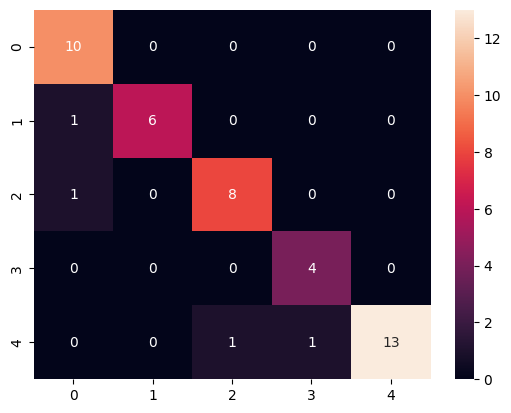

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d')

In [39]:
# testing on unseen data
print(test.head())


                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...   
4  अम्बाला के एक गाँव में किसानों की खेत से फसल च...   

                                           complaint  category  
0  In a restaurant in Karnal, unknown persons sto...         0  
1  A Municipal Corporation employee of Ambala was...         3  
2  A young man went to meet his girlfriend in Son...         3  
3  In Hisar, a Dalit man was found murdered at hi...         3  
4  Crops were stolen from farmers' fields in a vi...         0  


In [35]:
test_complaint= test['complaint']
import numpy as np

testvectors=[]
for text in test_complaint:
    if text!=[] :
        temp=[]
        for word in text:
            try:
                temp.append(model[word])
            except:
                pass
        if temp!=[]:
            testvectors.append(np.average(np.array(temp), axis=0))
        else:
            testvectors.append(np.zeros(300, dtype= np.float64))
    else:
        testvectors.append(np.zeros(300, dtype= np.float64))


print(testvectors[0])
test_predictions= clf.predict(testvectors)

[-0.16174571  0.09785017 -0.01777903  0.14588928 -0.05967458  0.02719943
 -0.04805756 -0.04786174 -0.04826736  0.02744675 -0.05751586 -0.04440689
 -0.19869614  0.01454671 -0.12027995  0.09952291  0.11602274  0.15333049
 -0.02765338  0.02442805 -0.20977275  0.00784175  0.12339655  0.01195208
 -0.11394278  0.05736035 -0.2094167   0.08370527 -0.03001531 -0.00101725
  0.01646201  0.02926095 -0.0706412  -0.12109884 -0.13995107  0.10805973
 -0.16443317  0.09175873 -0.05428576  0.07811483 -0.05377452 -0.08829244
  0.0766468   0.10261663  0.0425659  -0.01306117 -0.06609217 -0.16014607
 -0.08848826  0.13381958 -0.16977946  0.23990886 -0.03644562  0.23057048
  0.04057312  0.11089579 -0.16780598 -0.08254337  0.00762431 -0.15670776
 -0.13241132 -0.03575389 -0.1549085  -0.0642702  -0.02987162 -0.16758728
 -0.06921832  0.12580109 -0.07264201  0.06731415  0.05179087 -0.07327398
  0.04933039  0.01376788 -0.01967955  0.03102621  0.12694804  0.01621119
  0.02591006 -0.08572388 -0.11365509 -0.04043452 -0

In [41]:
print(list(test['category']))
print(test_predictions)

[0, 3, 3, 3, 0, 0, 4, 3, 3, 3, 2, 0, 3, 1, 1, 0, 2, 1, 1, 2, 3, 0, 0, 0, 1, 0, 2, 3, 4, 3, 4, 0, 3, 0, 4, 3, 0, 4, 0, 4, 3, 0, 0, 1, 1, 3, 2, 3, 3, 1, 0, 1, 3, 2, 0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 0, 1, 0, 0, 0, 4, 4, 3, 3, 1, 1, 1, 2, 0, 3, 0, 0, 0, 0, 4, 1, 1, 3, 3, 2, 2, 1, 3, 2, 1, 0, 3]
[0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 1 3 0 3 0 3 3 3 3 3 0 0 0 0 3 0 0 3 0
 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 3 3 0 3 0 0 1 0 3 0 0 3 0 0 0
 0 0 0 0 0 3 0 0 0 0 3 3 0 3 3 0 3 3 0 0 0 3]


In [36]:
print(accuracy_score(test['category'], test_predictions))

0.3958333333333333


In [37]:
# import random forest classifier, decision tree classifier and accuracy score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [38]:
# use decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)
print('Accuracy score for decision tree model is: ', accuracy_score(y_val, dt_pred), '\n')

Accuracy score for decision tree model is:  0.5777777777777777 



<Axes: >

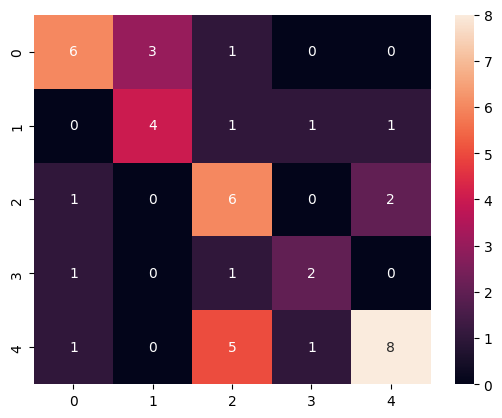

In [39]:
sns.heatmap(confusion_matrix(y_val, dt_pred), annot=True, fmt='d')

In [40]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
print('Accuracy score for random forest model is: ', accuracy_score(y_val, rf_pred), '\n')


Accuracy score for random forest model is:  0.9111111111111111 



In [41]:
test_predictions= rf.predict(testvectors)
print("Accuracy: ", accuracy_score(test['category'], test_predictions))

Accuracy:  0.3020833333333333


https://www.datacamp.com/tutorial/text-classification-python


In [122]:
# data= pd.read_csv('complaint with manual labels.csv')

<Axes: xlabel='category'>

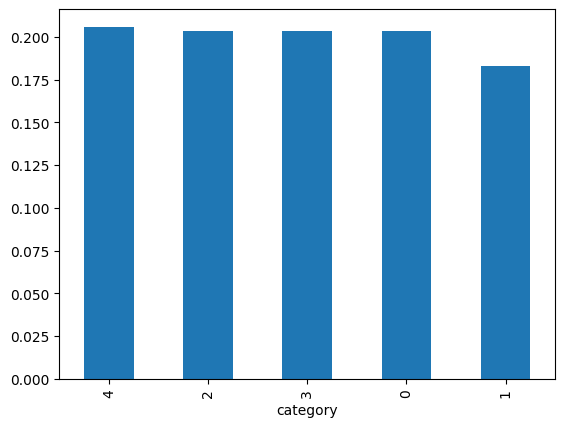

In [42]:
# check target balance
data= df
data['category'].value_counts(normalize = True).plot.bar()

In [43]:
# text preprocessing




# download nltk

# import nltk

# nltk.download('all')




# create a list text

text = list(data['complaint'])




# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()




corpus = []




for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

data['text'] = corpus

data.head()

,hindi,complaint,category,text
0,सोनीपत में दो बच्चों पांच साल के लड़के और दो स...,"Two children, a five-year-old boy and a two-ye...",2,two child five year old boy two year old girl ...
1,पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...,"In Panchkula, where the bride's neighbor alleg...",3,panchkula bride neighbor allegedly killed fath...
2,सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...,After kidnapping a seven-year-old child of his...,2,kidnapping seven year old child relative sonep...
3,थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...,"Just six months after marriage in Thanesar, a ...",3,six month marriage thanesar newly married woma...
4,मवार को डकैती के मामलों में वांछित दो लोगों को...,Mawar has arrested two people wanted in robber...,0,mawar arrested two people wanted robbery case ...


In [44]:
# Create Feature and Label sets

X = data['text']

y = data['category']




# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=123)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_val.shape)

Training Data : (397,)
Testing Data :  (45,)


In [45]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(397, 2170)

In [46]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_val_cv = cv.transform(X_val)




# generate predictions

predictions = lr.predict(X_val_cv)

predictions

array([3, 3, 1, 2, 4, 4, 4, 4, 0, 3, 2, 0, 4, 4, 2, 1, 1, 1, 1, 0, 0, 3,
       3, 0, 4, 0, 3, 2, 4, 2, 0, 4, 0, 2, 4, 0, 1, 4, 2, 1, 3, 4, 4, 4,
       1], dtype=int64)

In [47]:
# confusion matrix

import pandas as pd

from sklearn import metrics

mat = pd.DataFrame(metrics.confusion_matrix(y_val,predictions))

mat

,0,1,2,3,4
0,7,0,0,0,0
1,0,7,0,0,0
2,2,0,6,0,3
3,0,1,1,6,0
4,0,0,0,1,11


In [48]:
accuracy_score(y_val, predictions)

0.8222222222222222

In [49]:
# test on unseen data
test_predictions= lr.predict(cv.transform(test['complaint']))
print(list(test['category']))
print(test_predictions)


[0, 3, 3, 3, 0, 0, 4, 3, 3, 3, 2, 0, 3, 1, 1, 0, 2, 1, 1, 2, 3, 0, 0, 0, 1, 0, 2, 3, 4, 3, 4, 0, 3, 0, 4, 3, 0, 4, 0, 4, 3, 0, 0, 1, 1, 3, 2, 3, 3, 1, 0, 1, 3, 2, 0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 0, 1, 0, 0, 0, 4, 4, 3, 3, 1, 1, 1, 2, 0, 3, 0, 0, 0, 0, 4, 1, 1, 3, 3, 2, 2, 1, 3, 2, 1, 0, 3]
[2 3 3 3 0 0 4 3 3 2 2 0 3 1 1 1 2 1 3 2 3 0 0 3 1 1 2 0 4 2 4 1 3 0 4 3 0
 4 0 4 3 0 0 1 1 3 2 3 2 1 0 1 3 2 0 1 0 3 0 3 3 3 3 2 0 1 0 0 0 4 2 3 0 2
 1 3 2 0 3 2 0 0 0 4 1 1 1 2 3 4 1 3 4 1 0 3]


In [50]:
accuracy_score(test['category'], test_predictions)

0.78125

https://stackabuse.com/text-classification-with-python-and-scikit-learn/

In [51]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
# nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords


In [52]:
print(df.head())

                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint  category  \
0  Two children, a five-year-old boy and a two-ye...         2   
1  In Panchkula, where the bride's neighbor alleg...         3   
2  After kidnapping a seven-year-old child of his...         2   
3  Just six months after marriage in Thanesar, a ...         3   
4  Mawar has arrested two people wanted in robber...         0   

                                                text  
0  two child five year old boy two year old girl ...  
1  panchkula bride neighbor allegedly killed fath...  
2  kidnapping seven year old child relative sonep...  
3  six month marriage thanesar newly married w

In [53]:
x= df['complaint']
y= df['category']


In [54]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, ngram_range= (1,2), stop_words='english')
X = tfidfconverter.fit_transform(documents).toarray()

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [60]:
y_pred = classifier.predict(X_val)


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))

[[17  0  4  0  0]
 [ 0 15  0  0  0]
 [ 0  0  8  1  3]
 [ 0  1  0 15  2]
 [ 0  0  0  2 21]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.94      1.00      0.97        15
           2       0.67      0.67      0.67        12
           3       0.83      0.83      0.83        18
           4       0.81      0.91      0.86        23

    accuracy                           0.85        89
   macro avg       0.85      0.84      0.84        89
weighted avg       0.86      0.85      0.85        89

0.8539325842696629


In [62]:
# test on unseen data
test_predictions= classifier.predict(tfidfconverter.transform(test['complaint']))
print(list(test['category']))
print(test_predictions)


[0, 3, 3, 3, 0, 0, 4, 3, 3, 3, 2, 0, 3, 1, 1, 0, 2, 1, 1, 2, 3, 0, 0, 0, 1, 0, 2, 3, 4, 3, 4, 0, 3, 0, 4, 3, 0, 4, 0, 4, 3, 0, 0, 1, 1, 3, 2, 3, 3, 1, 0, 1, 3, 2, 0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 0, 1, 0, 0, 0, 4, 4, 3, 3, 1, 1, 1, 2, 0, 3, 0, 0, 0, 0, 4, 1, 1, 3, 3, 2, 2, 1, 3, 2, 1, 0, 3]
[2 3 3 3 3 0 4 3 3 3 2 0 3 1 1 1 2 1 3 2 3 0 0 3 1 0 2 3 4 3 3 1 3 0 4 3 0
 4 0 4 3 2 2 1 1 3 2 3 3 1 1 1 3 2 0 1 0 3 0 1 3 3 3 2 0 1 3 3 2 4 3 3 0 3
 1 3 2 0 3 2 0 0 2 4 1 1 1 2 3 4 1 3 2 2 2 3]


In [63]:
print(accuracy_score(test['category'], test_predictions))

0.71875


In [64]:
# Models:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

models = [LinearSVC(), MultinomialNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), LogisticRegression(), SGDClassifier()]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [65]:
from sklearn.model_selection import cross_val_score


entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will c

In [66]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
AdaBoostClassifier,0.463585,0.076349
DecisionTreeClassifier,0.726124,0.040524
GradientBoostingClassifier,0.812206,0.017248
KNeighborsClassifier,0.707942,0.050254
LinearSVC,0.825817,0.023169
LogisticRegression,0.825741,0.021044
MultinomialNB,0.814505,0.035057
RandomForestClassifier,0.807661,0.041873
SGDClassifier,0.791879,0.037987


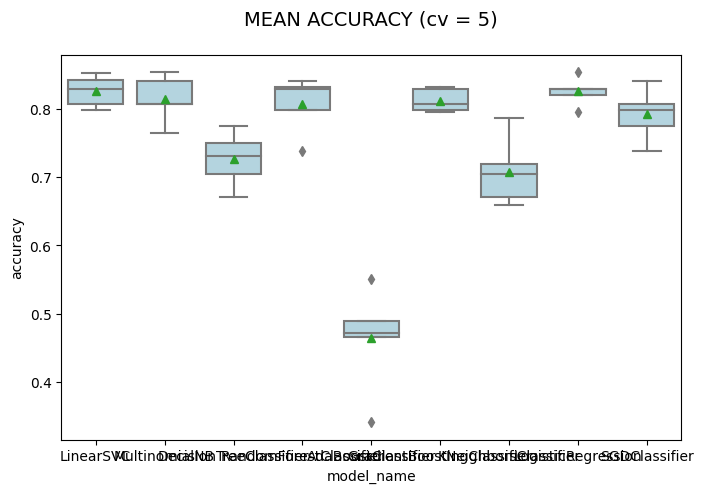

In [68]:
from matplotlib import pyplot as plt


plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                               y, 
                                                            test_size=0.1, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [70]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.86      0.92         7
           2       0.88      0.78      0.82         9
           3       0.80      1.00      0.89         4
           4       0.87      0.87      0.87        15

    accuracy                           0.87        45
   macro avg       0.87      0.88      0.87        45
weighted avg       0.87      0.87      0.87        45



In [71]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [72]:
# test on unseen data
test_predictions= model.predict(tfidfconverter.transform(test['complaint']))
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(test['category'], test_predictions))


				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.64      0.84      0.73        19
           2       0.62      0.80      0.70        10
           3       0.83      0.69      0.75        29
           4       0.88      0.78      0.82         9

    accuracy                           0.78        96
   macro avg       0.78      0.79      0.77        96
weighted avg       0.80      0.78      0.79        96



https://www.kaggle.com/code/heeraldedhia/text-classification-nlp

In [73]:
import numpy as np
import pandas as pd 

import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

In [74]:
# data = pd.read_csv('complaint with manual labels.csv')
data= df
display(data.shape) 

(442, 4)

In [79]:
data.columns

Index(['hindi', 'complaint', 'category', 'text'], dtype='object')

In [75]:
data["category"].value_counts()

category
4    91
2    90
3    90
0    90
1    81
Name: count, dtype: int64

In [76]:
data["category"].value_counts()/data.shape[0] 

category
4    0.205882
2    0.203620
3    0.203620
0    0.203620
1    0.183258
Name: count, dtype: float64

In [ ]:
pip install --upgrade nbformat


In [84]:
fig = go.Figure([go.Bar(x=data['category'].value_counts().index, y=data['category'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Complaint",
    xaxis_title="Complaints",
    yaxis_title="Values")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [77]:
# df['category'] = df.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})
# test['category'] = test.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})

data = data[["complaint","category"]] # taking text input and output variable as relevance
data = data[:1000]
data.shape

(442, 2)

In [78]:
data.head()


,complaint,category
0,"Two children, a five-year-old boy and a two-ye...",2
1,"In Panchkula, where the bride's neighbor alleg...",3
2,After kidnapping a seven-year-old child of his...,2
3,"Just six months after marriage in Thanesar, a ...",3
4,Mawar has arrested two people wanted in robber...,0


In [79]:
data['complaint'][0]

'Two children, a five-year-old boy and a two-year-old girl, were allegedly killed in Sonipat.\nHe was abducted at around 2.30 pm. The incident happened while they were playing\nAnd the parents went to work.'

In [80]:
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ") 
    doc = doc.replace("-", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])    
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [81]:
data['complaint'] = data['complaint'].apply(clean)
data.head()

,complaint,category
0,children year old boy year old girl allegedly ...,2
1,bride s neighbor allegedly killed father eve w...,3
2,kidnapping seven year old child relative child...,2
3,just months marriage newly married woman hange...,3
4,arrested people wanted robbery cases allegedly...,0


In [82]:
docs = list(data['complaint'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [83]:
X = docs 
y = data['category']
print(X.shape, y.shape)

(442, 2091) (442,)


In [101]:
fig = go.Figure([go.Bar(x=y.value_counts().index, y=y.value_counts().tolist())])
fig.update_layout(
    title="Values in each complaint",
    xaxis_title="Complaints",
    yaxis_title="Values")
fig.show()

In [84]:
SEED=246
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(397, 2091) (397,)
(45, 2091) (45,)


In [85]:
from sklearn.model_selection import cross_val_score


models = [LinearSVC(), MultinomialNB(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), LogisticRegression(), SGDClassifier()]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
AdaBoostClassifier,0.479520,0.074915
DecisionTreeClassifier,0.717263,0.018163
GaussianNB,0.692441,0.033606
GradientBoostingClassifier,0.805388,0.029714
KNeighborsClassifier,0.703626,0.035775
LinearSVC,0.837053,0.030857
LogisticRegression,0.832559,0.027206
MultinomialNB,0.812181,0.028561
RandomForestClassifier,0.819025,0.022291


In [86]:
gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 62.5 ms
Wall time: 48.2 ms

Training Accuracy score: 0.9949622166246851
Testing Accuracy score: 0.6888888888888889


In [87]:
#testing on unseen data
# test = pd.read_csv('testdata.csv')
# test['category'] = test.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})
test['complaint'] = test['complaint'].apply(clean)
docs = list(test['complaint'])
tfidf_vectorizer_vectors = tfidf_vectorizer.transform(docs)
docs = tfidf_vectorizer_vectors.toarray()
testX = docs 
testy = test['category']
print(testX.shape, testy.shape)

(96, 2091) (96,)


In [88]:
test_pred = gnb.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))



Testing Accuracy score: 0.625


In [89]:
print(classification_report(y_test, y_pred_test, target_names=['rape', 'murder', 'kidnap', 'accident', 'theft']))

              precision    recall  f1-score   support

        rape       0.70      0.78      0.74         9
      murder       0.88      0.88      0.88         8
      kidnap       0.58      0.78      0.67         9
    accident       0.50      0.44      0.47         9
       theft       0.86      0.60      0.71        10

    accuracy                           0.69        45
   macro avg       0.70      0.70      0.69        45
weighted avg       0.70      0.69      0.69        45



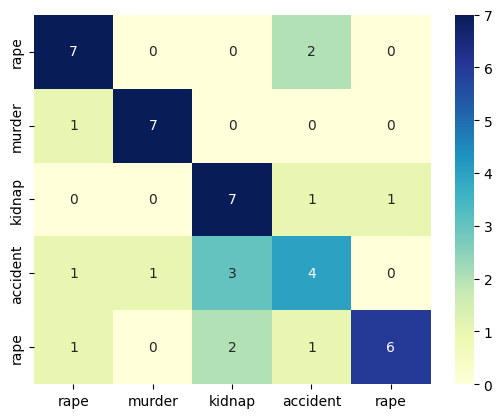

In [90]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder', 'kidnap', 'accident', 'rape'], 
                        index=['rape', 'murder','kidnap', 'accident', 'rape'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [91]:
print(classification_report(testy, test_pred, target_names=['rape', 'murder','kidnap', 'accident', 'theft']))
print(accuracy_score(testy, test_pred))

              precision    recall  f1-score   support

        rape       0.72      0.72      0.72        29
      murder       0.72      0.95      0.82        19
      kidnap       0.36      0.40      0.38        10
    accident       0.62      0.34      0.44        29
       theft       0.47      0.78      0.58         9

    accuracy                           0.62        96
   macro avg       0.58      0.64      0.59        96
weighted avg       0.63      0.62      0.61        96

0.625


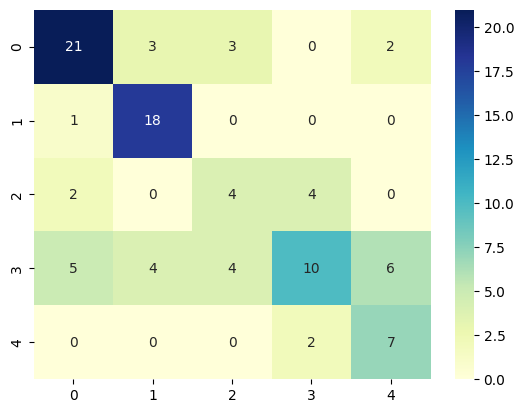

In [92]:
cm = confusion_matrix(testy, test_pred)
# print('Confusion matrix\n', cm)

# cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder','kidnap', 'accident', 'theft'], 
                        # index=['rape', 'murder','kidnap', 'accident', 'theft'])
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [93]:
mnb = MultinomialNB() 
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 7.14 ms

Training Accuracy score: 0.9722921914357683
Testing Accuracy score: 0.9111111111111111


In [94]:
test_pred = mnb.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.75


In [95]:
print(classification_report(y_test, y_pred_test, target_names=['rape', 'murder', 'kidnap','accident', 'theft']))

              precision    recall  f1-score   support

        rape       0.89      0.89      0.89         9
      murder       0.78      0.88      0.82         8
      kidnap       1.00      1.00      1.00         9
    accident       1.00      0.78      0.88         9
       theft       0.91      1.00      0.95        10

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [96]:
print(classification_report(testy, test_pred, target_names=['rape', 'murder', 'kidnap','accident', 'theft']))
print(accuracy_score(testy, test_pred))

              precision    recall  f1-score   support

        rape       0.81      0.76      0.79        29
      murder       0.72      0.95      0.82        19
      kidnap       0.71      0.50      0.59        10
    accident       0.90      0.62      0.73        29
       theft       0.53      1.00      0.69         9

    accuracy                           0.75        96
   macro avg       0.74      0.77      0.72        96
weighted avg       0.78      0.75      0.75        96

0.75


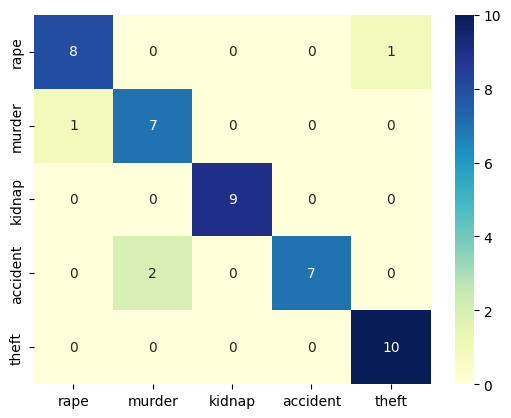

In [97]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder','kidnap', 'accident', 'theft'], 
                        index=['rape', 'murder','kidnap', 'accident', 'theft'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

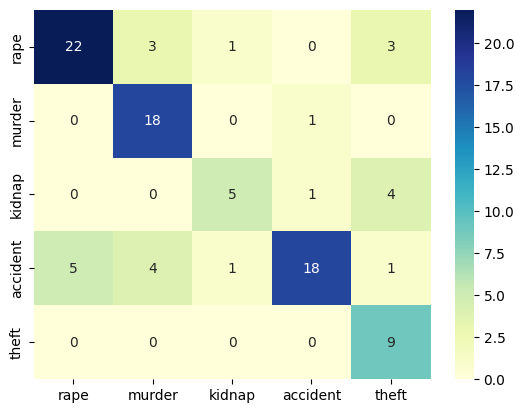

In [98]:
cm = confusion_matrix(testy, test_pred)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder','kidnap', 'accident', 'theft'], 
                        index=['rape', 'murder','kidnap', 'accident', 'theft'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [99]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 46.9 ms
Wall time: 192 ms

Training Accuracy score: 0.9874055415617129
Testing Accuracy score: 0.9333333333333333


In [100]:
test_pred = lr.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8020833333333334


In [101]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 16.9 ms

Training Accuracy score: 0.9974811083123426
Testing Accuracy score: 0.9333333333333333


In [102]:
test_pred = svc.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8333333333333334


In [129]:
from sklearn.calibration import CalibratedClassifierCV


calibrated_svc= CalibratedClassifierCV(base_estimator=svc, cv=5)


In [130]:
calibrated_svc.fit(X_train, y_train)
predicted= calibrated_svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9333333333333333


In [132]:
predicted= calibrated_svc.predict(testX)
print("Accuracy:",metrics.accuracy_score(testy, predicted))

Accuracy: 0.8333333333333334


In [137]:
calibrated_svc.predict_proba(testX)*100

array([[40.53906954, 20.43673768, 18.90176323, 16.66410502,  3.45832452],
       [24.35198563,  2.42345769, 11.77714679, 60.16217394,  1.28523594],
       [ 0.46919201,  0.39817718,  4.42512737, 89.00400372,  5.70349972],
       [ 2.56548336,  1.36064932, 12.73380585, 82.79791222,  0.54214925],
       [56.43846413,  6.26174676,  7.36588081,  8.95222342, 20.98168489],
       [74.3292177 ,  0.98077692,  7.50029069,  4.72848445, 12.46123024],
       [ 0.69549379,  2.10434942, 14.70684312, 25.75423049, 56.73908319],
       [ 8.56864969,  5.14189387, 13.00205383, 71.71198518,  1.57541743],
       [ 0.89695762,  2.00240257, 26.53143747, 59.67245699, 10.89674534],
       [ 0.81493095, 20.72748479, 21.07386885, 55.62129174,  1.76242367],
       [20.68660657,  0.83970712, 50.59254795,  4.93971844, 22.94141992],
       [60.03025191, 13.94613502, 17.54466649,  3.43085546,  5.04809112],
       [ 6.43211014,  2.49506194,  7.248249  , 77.44632888,  6.37825004],
       [ 9.6754803 , 77.93935723,  8.0

In [107]:
from sklearn import svm

rbf= svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly= svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [108]:
rbf_val= rbf.predict(X_test)
poly_val= poly.predict(X_test)

print("RBF Accuracy: ", accuracy_score(y_test, rbf_val))
print("Poly Accuracy: ", accuracy_score(y_test, poly_val))

RBF Accuracy:  0.6888888888888889
Poly Accuracy:  0.7111111111111111


In [109]:
rbf_test_pred = rbf.predict(testX)
poly_test_pred = poly.predict(testX)
print("\nRBF Testing Accuracy score:",accuracy_score(testy, rbf_test_pred))
print("\nPolynomial Testing Accuracy score:",accuracy_score(testy, poly_test_pred))


RBF Testing Accuracy score: 0.6145833333333334

Polynomial Testing Accuracy score: 0.7083333333333334


In [110]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 46.9 ms
Wall time: 72.5 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.8


In [111]:
test_pred = dt.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.625


In [112]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9949622166246851
Testing Accuracy score: 0.8888888888888888


In [113]:
test_pred = vc.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8229166666666666


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import sklearn.model_selection as model_selection

kfold= model_selection.KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4 = GaussianNB()
estimators.append(('nb', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())


0.816025641025641


In [115]:
ensemble.fit(X_train, y_train)
y_pred_train=ensemble.predict(X_train)
y_pred_test = ensemble.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 0.9949622166246851
Testing Accuracy score: 0.9333333333333333


In [116]:
test_pred = ensemble.predict(testX)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8229166666666666


In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import sklearn.model_selection as model_selection
import xgboost as xgb
kfold= model_selection.KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = LinearSVC()
estimators.append(('svm', model2))
model3 = MultinomialNB()
estimators.append(('nb', model3))
model4 = RandomForestClassifier()
estimators.append(('rf', model4))
model5= xgb.XGBClassifier()
estimators.append(('xgb', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())


0.8008333333333333


In [119]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('svm', LinearSVC()), ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_typ...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [120]:

# Model Evaluation
from sklearn.metrics import f1_score


y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9333
Precision: 0.9405
Recall: 0.9333
F1-score: 0.9331


In [121]:
test_pred = ensemble.predict(testX)
accuracy= accuracy_score(testy, test_pred)
precision= precision_score(testy, test_pred, average='weighted')
recall= recall_score(testy, test_pred, average='weighted')
f1= f1_score(testy, test_pred, average='weighted')
print("Testing Accuracy score: ",accuracy)
print("Testing Precision score: ",precision)
print("Testing Recall score: ",recall)
print("Testing F1 score: ",f1)


Testing Accuracy score:  0.8125
Testing Precision score:  0.8178289646813197
Testing Recall score:  0.8125
Testing F1 score:  0.8100986995675464


In [122]:
#IMPORT xgboost
from sklearn.metrics import f1_score
import xgboost as xgb

# XGBoost Classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



Accuracy: 0.8667
Precision: 0.8685
Recall: 0.8667
F1-score: 0.8667


In [123]:
test_pred = model.predict(testX)
accuracy= accuracy_score(testy, test_pred)
precision= precision_score(testy, test_pred, average='weighted')
recall= recall_score(testy, test_pred, average='weighted')
f1= f1_score(testy, test_pred, average='weighted')
print("Testing Accuracy score: ",accuracy)
print("Testing Precision score: ",precision)
print("Testing Recall score: ",recall)
print("Testing F1 score: ",f1)


Testing Accuracy score:  0.7395833333333334
Testing Precision score:  0.7704947916666667
Testing Recall score:  0.7395833333333334
Testing F1 score:  0.7398631739137204


In [124]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# XGBoost Classifier with default hyperparameters
base_model = xgb.XGBClassifier()

# RandomizedSearchCV for hyperparameter tuning
random_search_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

random_search = RandomizedSearchCV(base_model, random_search_params, n_iter=10, scoring='accuracy', cv=3, random_state=42)
random_search.fit(X_train, y_train)

print("Best hyperparameters from RandomizedSearchCV:")
print(random_search.best_params_)

# GridSearchCV for further fine-tuning
grid_search_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 7, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(base_model, grid_search_params, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

print("Best hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Prediction on New Data
new_texts = ["A person was murdered.", "My car was hit by another car."]
tfidf_new = tfidf_vectorizer.transform(new_texts)
new_predictions = best_model.predict(tfidf_new)

print(new_predictions)


KeyboardInterrupt: 

In [129]:
test_pred = best_model.predict(testX)
accuracy= accuracy_score(testy, test_pred)
precision= precision_score(testy, test_pred, average='weighted')
recall= recall_score(testy, test_pred, average='weighted')
f1= f1_score(testy, test_pred, average='weighted')
print("Testing Accuracy score: ",accuracy)
print("Testing Precision score: ",precision)
print("Testing Recall score: ",recall)
print("Testing F1 score: ",f1)


Testing Accuracy score:  0.7291666666666666
Testing Precision score:  0.7543876925770308
Testing Recall score:  0.7291666666666666
Testing F1 score:  0.7313232703268081


In [130]:

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Prediction on New Data
new_texts = ["A person was murdered.", "My car was hit by another car."]
tfidf_new = tfidf_vectorizer.transform(new_texts)
new_predictions = best_model.predict(tfidf_new)

print(new_predictions)

Accuracy: 0.8667
Precision: 0.8685
Recall: 0.8667
F1-score: 0.8667
[3 1]


In [131]:
test_pred = best_model.predict(testX)
accuracy= accuracy_score(testy, test_pred)
precision= precision_score(testy, test_pred, average='weighted')
recall= recall_score(testy, test_pred, average='weighted')
f1= f1_score(testy, test_pred, average='weighted')
print("Testing Accuracy score: ",accuracy)
print("Testing Precision score: ",precision)
print("Testing Recall score: ",recall)
print("Testing F1 score: ",f1)


Testing Accuracy score:  0.7708333333333334
Testing Precision score:  0.8129076086956522
Testing Recall score:  0.7708333333333334
Testing F1 score:  0.7792506105006104
